Columns with null values: ['Age', 'Cabin', 'Embarked']


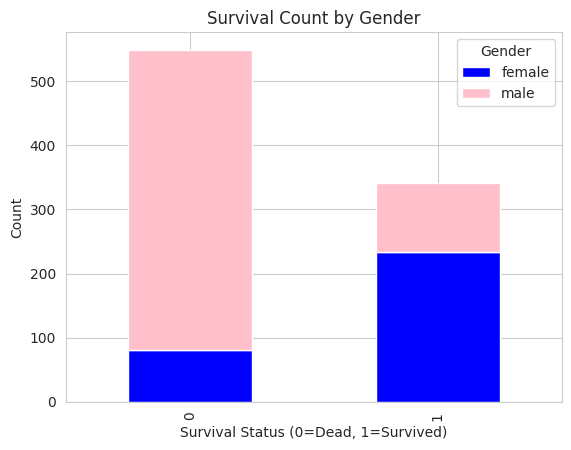

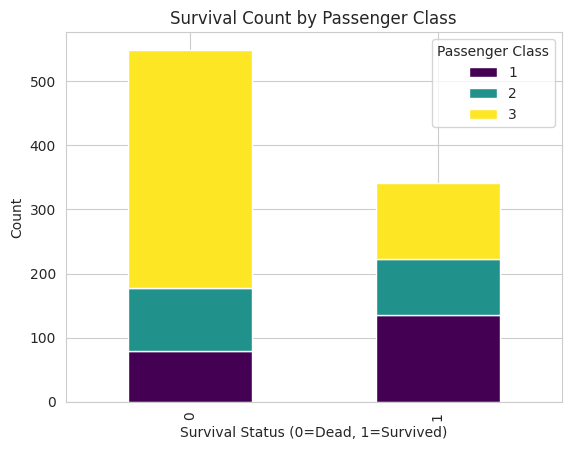

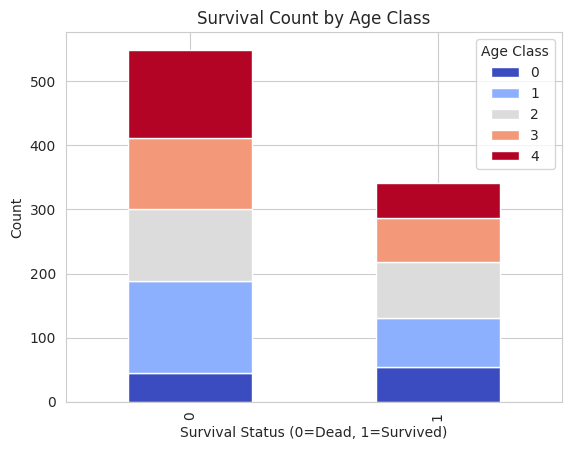

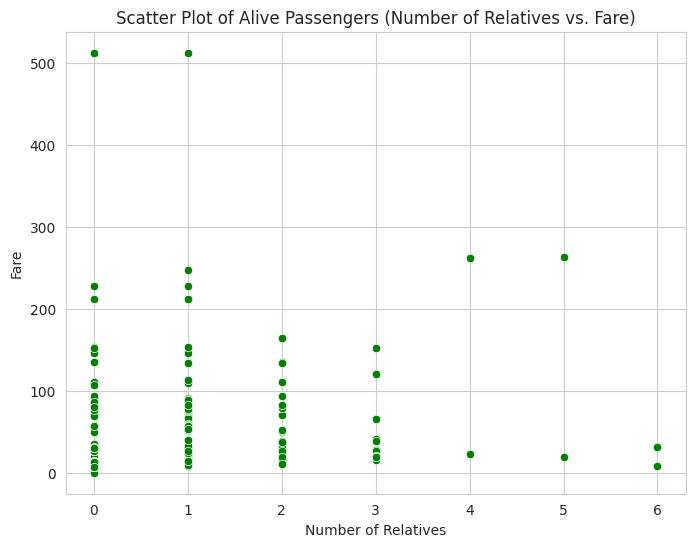

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
titanic_url = "https://raw.githubusercontent.com/PulockDas/pd-12-resources/refs/heads/master/titanic.csv"
df = pd.read_csv(titanic_url)

# Find columns with Null values
null_columns = df.columns[df.isnull().any()]
print("Columns with null values:", null_columns.tolist())

# Fill Null values in 'Age' with the mean
df['Age'].fillna(df['Age'].mean())

# Fill Null values in 'Cabin' with 'Unknown'
df['Cabin'].fillna('Unknown')

# Plot Survived vs Dead with Male and Female count
sns.set_style("whitegrid")
survival_counts = df.groupby(['Survived', 'Sex']).size().unstack()
survival_counts.plot(kind='bar', stacked=True, color=['blue', 'pink'])
plt.xlabel("Survival Status (0=Dead, 1=Survived)")
plt.ylabel("Count")
plt.title("Survival Count by Gender")
plt.legend(title="Gender")
plt.show()

# Plot Survived vs Dead with Pclass
pclass_counts = df.groupby(['Survived', 'Pclass']).size().unstack()
pclass_counts.plot(kind='bar', stacked=True, cmap='viridis')
plt.xlabel("Survival Status (0=Dead, 1=Survived)")
plt.ylabel("Count")
plt.title("Survival Count by Passenger Class")
plt.legend(title="Passenger Class")
plt.show()

# Create 'AgeClass' column
def age_class(age):
    if age <= 16:
        return 0
    elif age <= 26:
        return 1
    elif age <= 36:
        return 2
    elif age <= 62:
        return 3
    else:
        return 4

df['AgeClass'] = df['Age'].apply(age_class)

# Drop the 'Age' column
df.drop(columns=['Age'], inplace=True)

# Plot Survived vs Dead with AgeClass
ageclass_counts = df.groupby(['Survived', 'AgeClass']).size().unstack()
ageclass_counts.plot(kind='bar', stacked=True, cmap='coolwarm')
plt.xlabel("Survival Status (0=Dead, 1=Survived)")
plt.ylabel("Count")
plt.title("Survival Count by Age Class")
plt.legend(title="Age Class")
plt.show()

# Create 'Number of Relatives' column
df['Number of Relatives'] = df['SibSp'] + df['Parch']


# Filter only the alive passengers
alive_passengers = df[df['Survived'] == 1]

# Create scatter plot for alive passengers
plt.figure(figsize=(8, 6))
sns.scatterplot(x=alive_passengers['Number of Relatives'],
                y=alive_passengers['Fare'],
                color='green')

plt.xlabel("Number of Relatives")
plt.ylabel("Fare")
plt.title("Scatter Plot of Alive Passengers (Number of Relatives vs. Fare)")
plt.show()
